In [1]:
# Load package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("data/NY property data.csv")

In [3]:
# Number of records and fields
df.shape

(1070994, 32)

In [4]:
df.head().T

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
B,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [6]:
# Get names of numeric fields
df.select_dtypes(["float", "int"]).columns.to_list()

['RECORD',
 'B',
 'BLOCK',
 'LOT',
 'LTFRONT',
 'LTDEPTH',
 'STORIES',
 'FULLVAL',
 'AVLAND',
 'AVTOT',
 'EXLAND',
 'EXTOT',
 'EXCD1',
 'ZIP',
 'BLDFRONT',
 'BLDDEPTH',
 'AVLAND2',
 'AVTOT2',
 'EXLAND2',
 'EXTOT2',
 'EXCD2']

In [178]:
numeric = [
    "LTFRONT",
    "LTDEPTH",
    "STORIES",
    "FULLVAL",
    "AVLAND",
    "AVTOT",
    "EXLAND",
    "EXTOT",
    "BLDFRONT",
    "BLDDEPTH",
    "AVLAND2",
    "AVTOT2",
    "EXLAND2",
    "EXTOT2"
]

In [8]:
# Get names of categorical fields
df.select_dtypes(["object"]).columns.to_list()

['BBLE',
 'EASEMENT',
 'OWNER',
 'BLDGCL',
 'TAXCLASS',
 'EXT',
 'STADDR',
 'EXMPTCL',
 'PERIOD',
 'YEAR',
 'VALTYPE']

In [179]:
categorical = [
    "RECORD",
    "B",
    "BLOCK",
    "LOT",
    "BBLE",
    "EASEMENT",
    "OWNER",
    "BLDGCL",
    "TAXCLASS",
    "EXT",
    "EXCD1",
    "EXCD2",
    "STADDR",
    "EXMPTCL",
    "ZIP",
    "PERIOD",
    "YEAR",
    "VALTYPE",
]

### Numeric Fields 

In [180]:
# % populated
(df.shape[0] - df[numeric].isnull().sum()) / df.shape[0] * 100

LTFRONT     100.000000
LTDEPTH     100.000000
STORIES      94.746563
FULLVAL     100.000000
AVLAND      100.000000
AVTOT       100.000000
EXLAND      100.000000
EXTOT       100.000000
BLDFRONT    100.000000
BLDDEPTH    100.000000
AVLAND2      26.398467
AVTOT2       26.399027
EXLAND2       8.165218
EXTOT2       12.215568
dtype: float64

In [181]:
(df[numeric] == 0).sum(axis=0)

LTFRONT     169108
LTDEPTH     170128
STORIES          0
FULLVAL      13007
AVLAND       13009
AVTOT        13007
EXLAND      491699
EXTOT       432572
BLDFRONT    228815
BLDDEPTH    228853
AVLAND2          0
AVTOT2           0
EXLAND2          0
EXTOT2           0
dtype: int64

In [182]:
numericSum = df[numeric].describe().T
numericSum["% populated"] = (
    (df.shape[0] - df[numeric].isnull().sum()) / df.shape[0] * 100
)
numericSum["# zeros"] = (df[numeric] == 0).sum(axis=0)
numericSum["# unique"] = df[numeric].nunique()
numericSum["count"] = numericSum["count"].astype(int)
numericSum[["mean", "std", "% populated"]] = round(
    numericSum[["mean", "std", "% populated"]], 2
)
numericSum

,count,mean,std,min,25%,50%,75%,max,% populated,# zeros,# unique
LTFRONT,1070994,36.64,74.03,0.0,19.0,25.0,40.00,9.999000e+03,100.00,169108,1297
LTDEPTH,1070994,88.86,76.40,0.0,80.0,100.0,100.00,9.999000e+03,100.00,170128,1370
STORIES,1014730,5.01,8.37,1.0,2.0,2.0,3.00,1.190000e+02,94.75,0,111
FULLVAL,1070994,874264.51,11582430.99,0.0,304000.0,447000.0,619000.00,6.150000e+09,100.00,13007,109324
AVLAND,1070994,85067.92,4057260.06,0.0,9180.0,13678.0,19740.00,2.668500e+09,100.00,13009,70921
AVTOT,1070994,227238.17,6877529.31,0.0,18374.0,25340.0,45438.00,4.668309e+09,100.00,13007,112914
EXLAND,1070994,36423.89,3981575.79,0.0,0.0,1620.0,1620.00,2.668500e+09,100.00,491699,33419
EXTOT,1070994,91186.98,6508402.82,0.0,0.0,1620.0,2090.00,4.668309e+09,100.00,432572,64255
BLDFRONT,1070994,23.04,35.58,0.0,15.0,20.0,24.00,7.575000e+03,100.00,228815,612
BLDDEPTH,1070994,39.92,42.71,0.0,26.0,39.0,50.00,9.393000e+03,100.00,228853,621


In [13]:
# Save the summary statistics to a csv file 
numericSum.to_csv("summary_numeric.csv")

### Categorical Fields 

In [183]:
categoricalSum = pd.DataFrame({"count": df[categorical].count()})
categoricalSum["% populated"] = categoricalSum["count"] / df.shape[0] * 100
categoricalSum["# zeros"] = (df[categorical] == 0).sum(axis=0)
categoricalSum["# unique"] = df[categorical].nunique()
categoricalSum["most common"] = (
    df[categorical]
    .mode()
    .iloc[
        0,
    ]
)
categoricalSum.loc[["RECORD", "BBLE"], "most common"] = "N/A"

In [184]:
categoricalSum

,count,% populated,# zeros,# unique,most common
RECORD,1070994,100.000000,0,1070994,N/A
B,1070994,100.000000,0,5,4.0
BLOCK,1070994,100.000000,0,13984,3944.0
LOT,1070994,100.000000,0,6366,1.0
BBLE,1070994,100.000000,0,1070994,N/A
EASEMENT,4636,0.432869,0,12,E
OWNER,1039249,97.035931,0,863347,PARKCHESTER PRESERVAT
BLDGCL,1070994,100.000000,0,200,R4
TAXCLASS,1070994,100.000000,0,11,1
EXT,354305,33.081885,0,3,G


In [16]:
# Save the summary statistics to a csv file 
categoricalSum.to_csv("summary_categorical.csv")

In [20]:
df["EXCD1"].unique()

array([4600., 2191., 2231.,   nan, 1501., 1505., 1605., 1925., 1985.,
       1021., 6320., 1010., 3390., 6800., 1017., 6200., 5110., 2202.,
       2500., 2133., 1504., 1523., 5116., 2262., 6120., 1521., 1511.,
       2201., 1301., 1601., 4520., 1404., 5109., 5106., 2233., 5111.,
       1401., 3500., 5102., 2151., 2400., 1022., 2134., 1920., 1015.,
       1101., 2280., 1850., 1650., 2132., 2171., 1402., 2131., 1571.,
       1986., 2172., 5108., 5101., 5104., 2252., 1603., 1700., 2232.,
       2261., 5129., 5103., 2251., 1602., 5105., 5112., 5130., 1200.,
       5113., 1840., 1604., 2220., 1522., 1023., 2152., 1990., 1881.,
       1640., 1880., 1660., 3380., 3410., 1403., 3400., 1620., 2350.,
       6400., 1950., 1992., 1891., 7160., 7120., 1882., 2120., 7165.,
       4550., 1872., 1841., 1630., 1016., 1572., 1606., 1870., 7170.,
       7150., 2310., 5107., 5114., 1102., 4530., 1951., 2100., 1871.,
       1019., 4650., 3360., 5118., 4500., 6600., 1011., 1562., 1961.,
       1963., 4540.,

### Distributions

In [161]:
#plt.rcParams["figure.figsize"] = [15, 8]
#sns.set(font_scale=1.5)

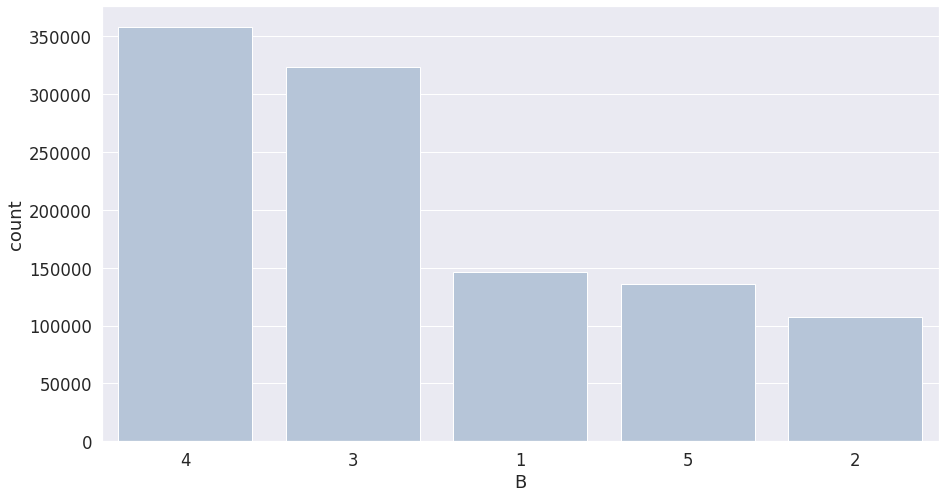

In [150]:
# B
fig = sns.countplot(
    x="B",
    data=df,
    order=df["B"].value_counts().index,
    color="lightsteelblue",
)
#fig.set_yscale("log")
#fig.set_ylabel("Log scale of count")
#plt.savefig("b.jpeg")

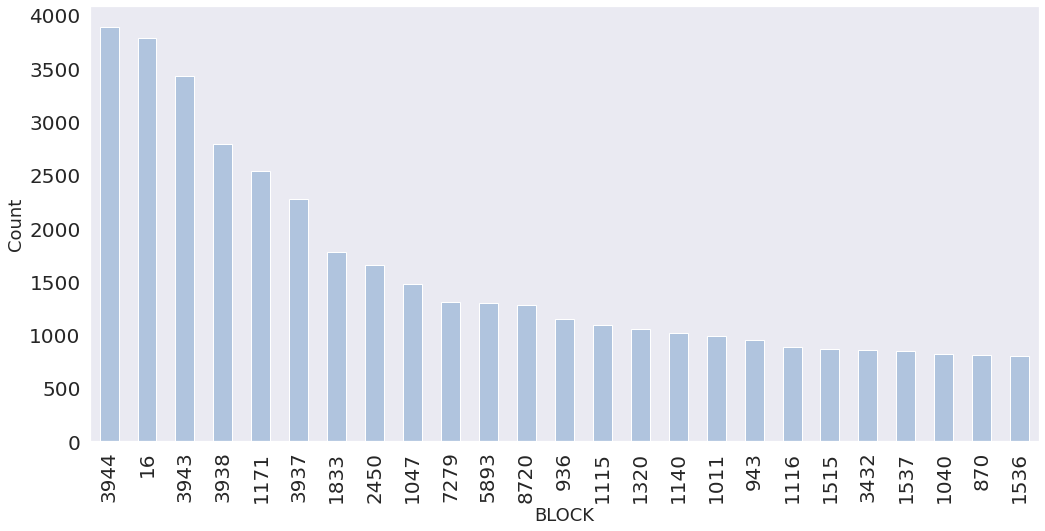

In [168]:
# BLOCK
df["BLOCK"].value_counts().head(25).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="BLOCK",
    grid=False,
)
#plt.savefig('block.jpeg', bbox_inches='tight')

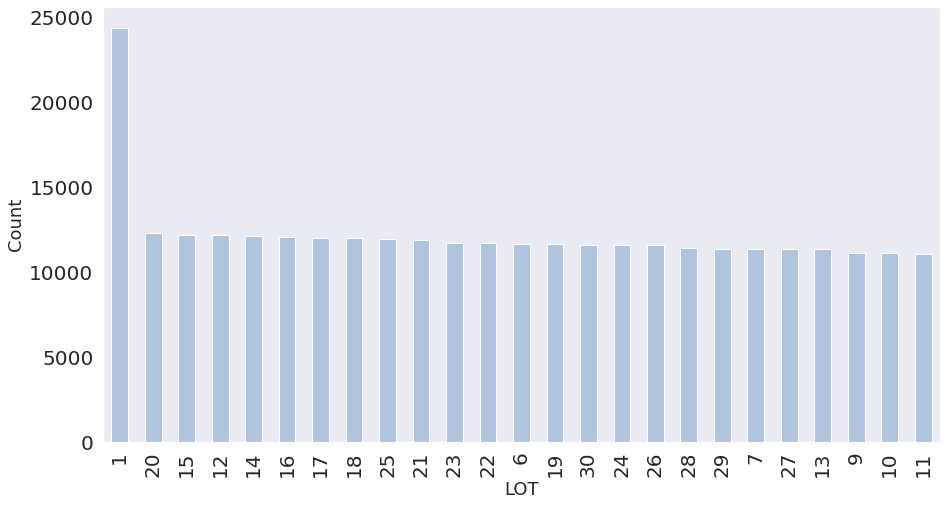

In [157]:
# LOT
df["LOT"].value_counts().head(25).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="LOT",
    grid=False,
)
#plt.savefig('lot.jpeg')

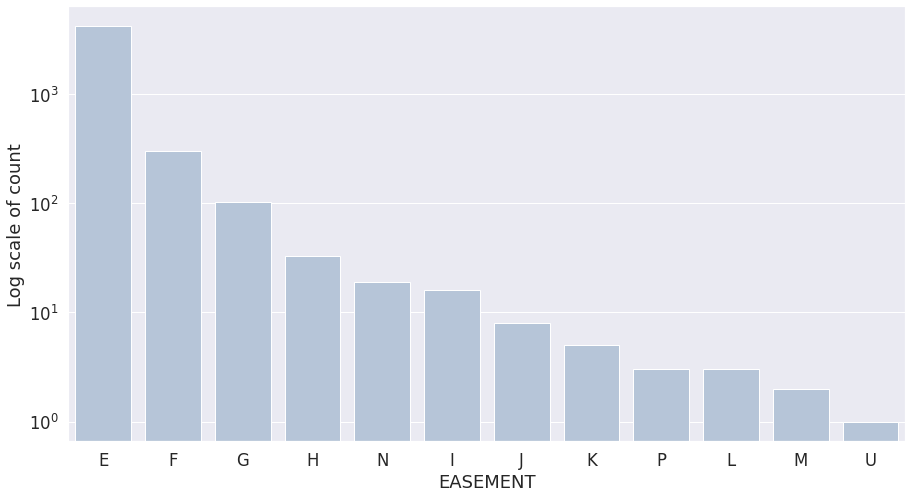

In [151]:
# EASEMENT
fig = sns.countplot(
    x="EASEMENT",
    data=df,
    order=df["EASEMENT"].value_counts().index,
    color="lightsteelblue",
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig("easement.jpeg")

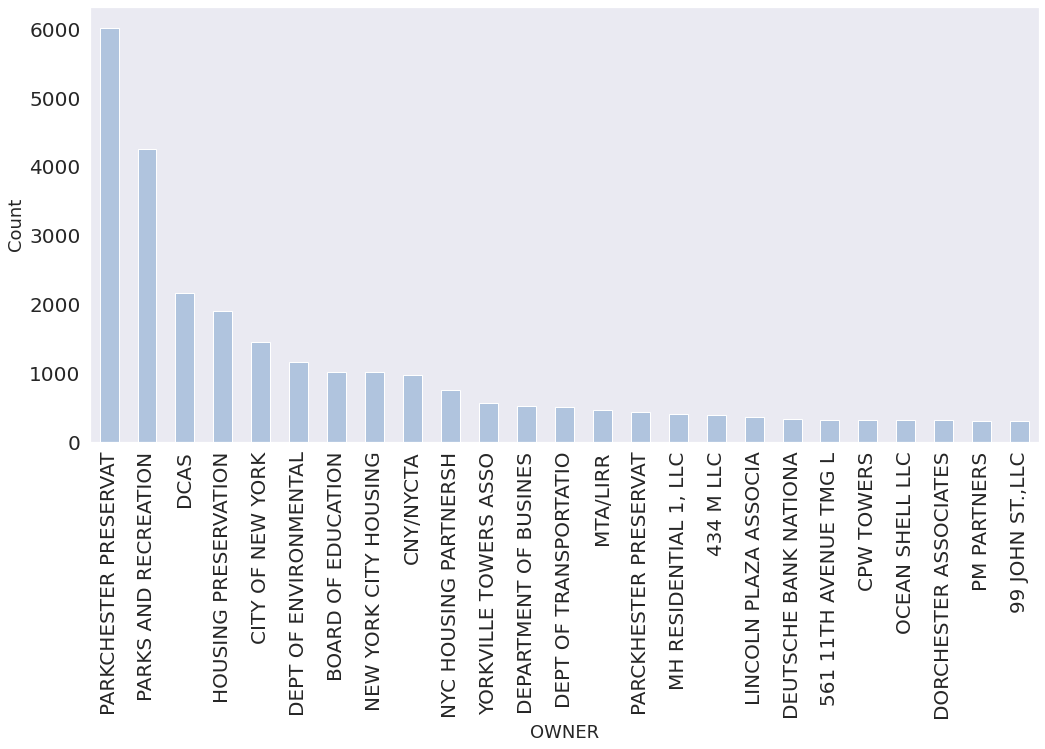

In [169]:
# OWNER
df["OWNER"].value_counts().head(25).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="OWNER",
    grid=False,
)
#plt.savefig("owner.jpeg", bbox_inches='tight')

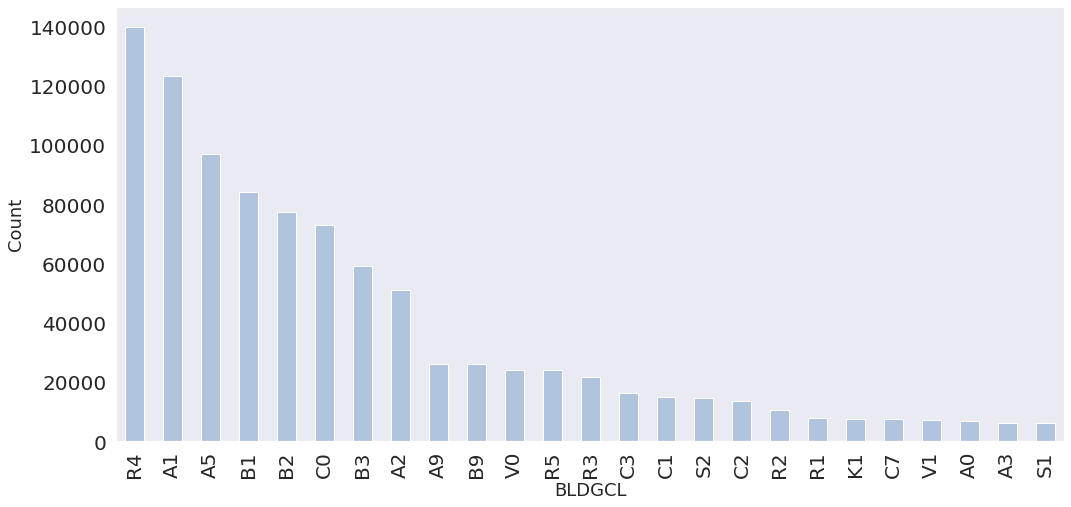

In [170]:
# BLDGCL
df["BLDGCL"].value_counts().head(25).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="BLDGCL",
    grid=False,
)
#plt.savefig("bldgcl.jpeg", bbox_inches='tight')

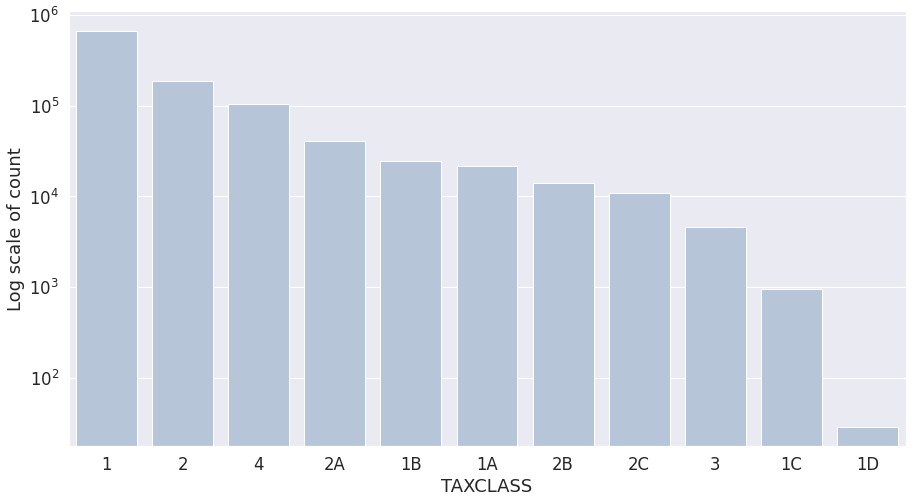

In [21]:
# TAXCLASS
fig = sns.countplot(
    x="TAXCLASS",
    data=df,
    order=df["TAXCLASS"].value_counts().index,
    color="lightsteelblue",
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig("taxclass.jpeg")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


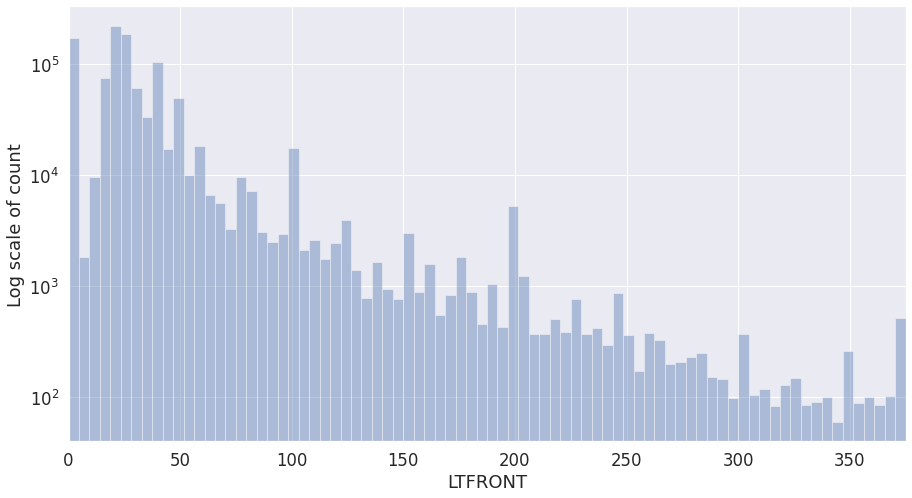

In [56]:
# LTFRONT
plt.xlim(0, 375)
fig = sns.distplot(
    df.query("LTFRONT <= 375")["LTFRONT"], bins=80, kde=False
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig('ltfront.jpeg')

In [36]:
df["LTFRONT"].quantile(0.995)

375.0

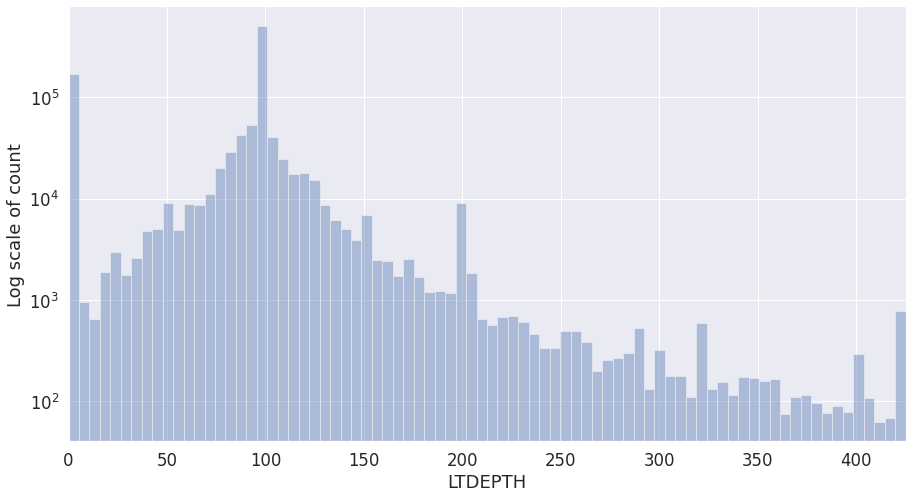

In [57]:
# LTDEPTH
plt.xlim(0, 425)
fig = sns.distplot(
    df.query("LTDEPTH <= 425")["LTDEPTH"], bins=80, kde=False
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig("ltdepth.jpeg")

In [40]:
df["LTDEPTH"].quantile(0.995)

425.0

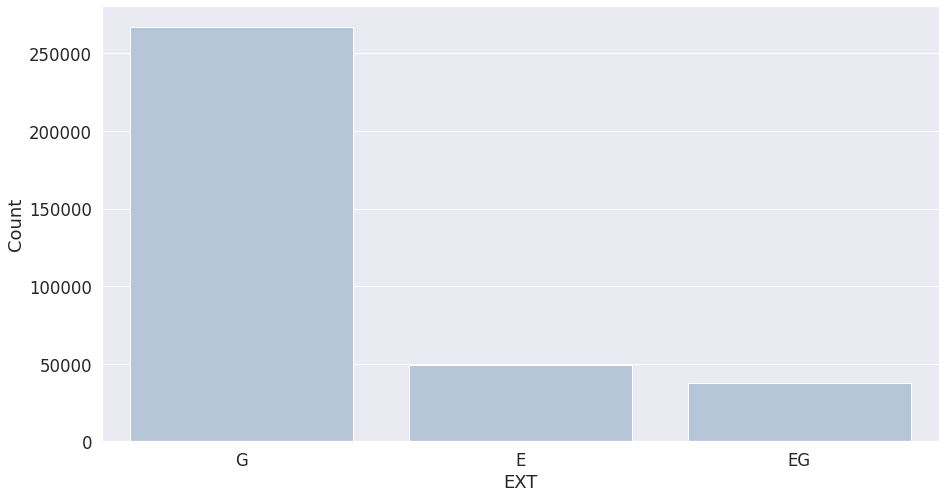

In [45]:
# EXT
fig = sns.countplot(
    x="EXT",
    data=df,
    order=df["EXT"].value_counts().index,
    color="lightsteelblue",
)
fig.set_ylabel("Count")
#plt.savefig("ext.jpeg")

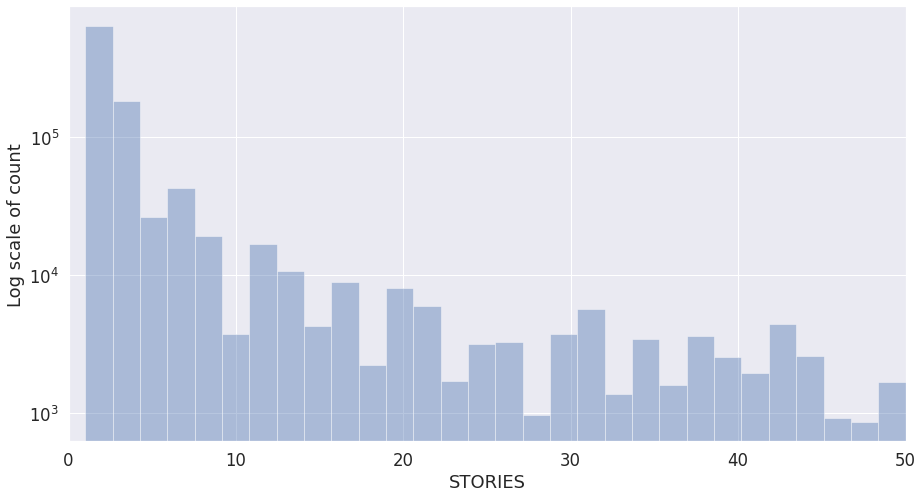

In [53]:
# STORIES
plt.xlim(0, 50)
fig = sns.distplot(
    df.query("STORIES <= 50")["STORIES"], kde=False, bins=30
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig("stories.jpeg")

In [46]:
df["STORIES"].quantile(0.995)

50.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


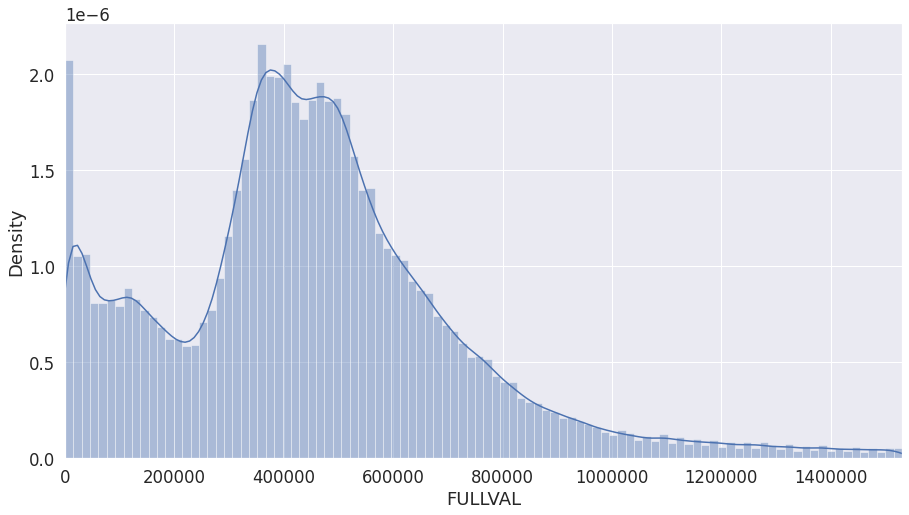

In [62]:
# FULLVAL
plt.xlim(0,1530000)
fig = sns.distplot(
    df.query("FULLVAL<=1530000")["FULLVAL"], kde=True, bins=100, norm_hist=True
)
#fig.ticklabel_format(style='plain', axis='y')
fig.ticklabel_format(style='plain', axis='x')
#plt.savefig("fullval.jpeg")

In [34]:
df["FULLVAL"].quantile(0.95)

1530000.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


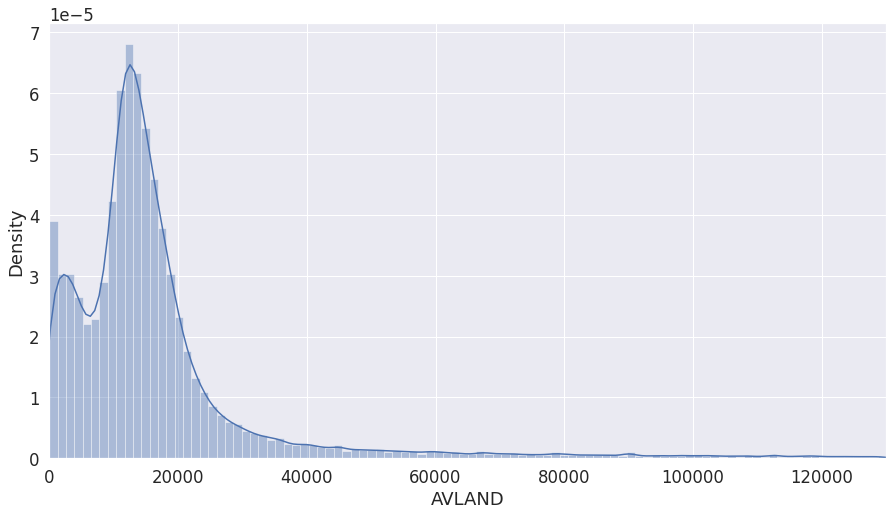

In [74]:
# AVLAND
plt.xlim(0, 130000)
fig = sns.distplot(
    df.query("AVLAND <= 130000")["AVLAND"],
    kde=True,
    bins=100,
    norm_hist=True
)
# fig.ticklabel_format(style='plain', axis='y')
#plt.savefig("avland.jpeg")

In [71]:
df["AVLAND"].quantile(0.95)

131388.74999999988

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


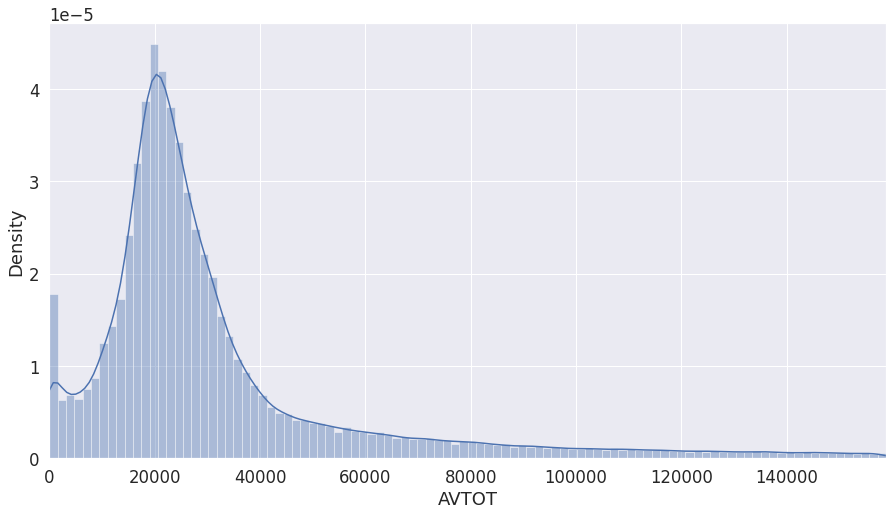

In [76]:
# AVTOT
plt.xlim(0,158850)
fig = sns.distplot(
    df.query("AVTOT<=158850")["AVTOT"],
    kde=True,
    bins=100,
    norm_hist=True
)
# fig.ticklabel_format(style='plain', axis='y')
#plt.savefig("avtot.jpeg")

In [38]:
df["AVTOT"].quantile(0.90)

158850.0

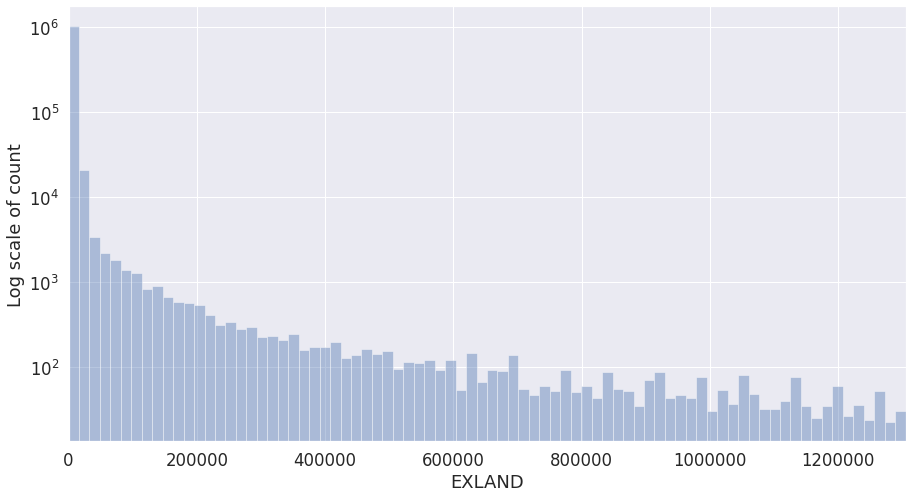

In [78]:
# EXLAND
plt.xlim(0, 1305000)
fig = sns.distplot(
    df.query("EXLAND<=1305000")["EXLAND"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("exland.jpeg")

In [40]:
df["EXLAND"].quantile(0.997)

1305000.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


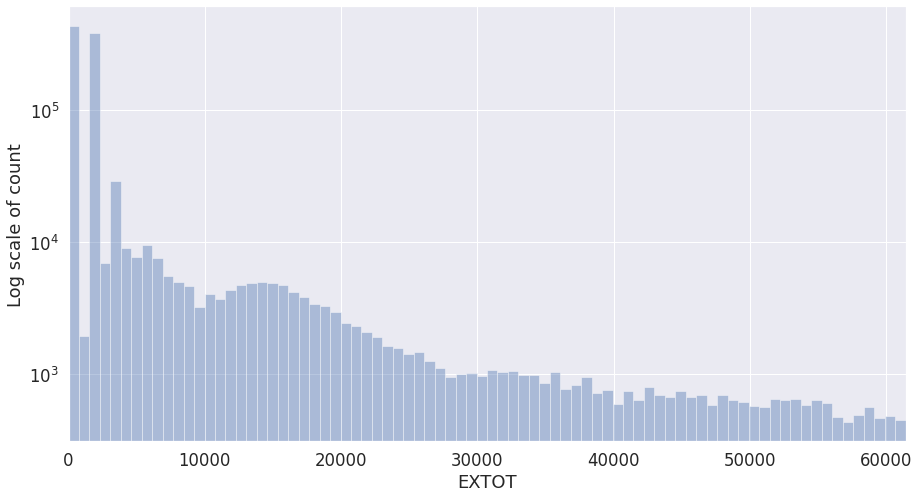

In [131]:
# EXTOT
plt.xlim(0, 61420)
fig = sns.distplot(
    df.query("EXTOT<=61420")["EXTOT"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("extot.jpeg")

In [129]:
df["EXTOT"].quantile(0.95)

61420.39999999991

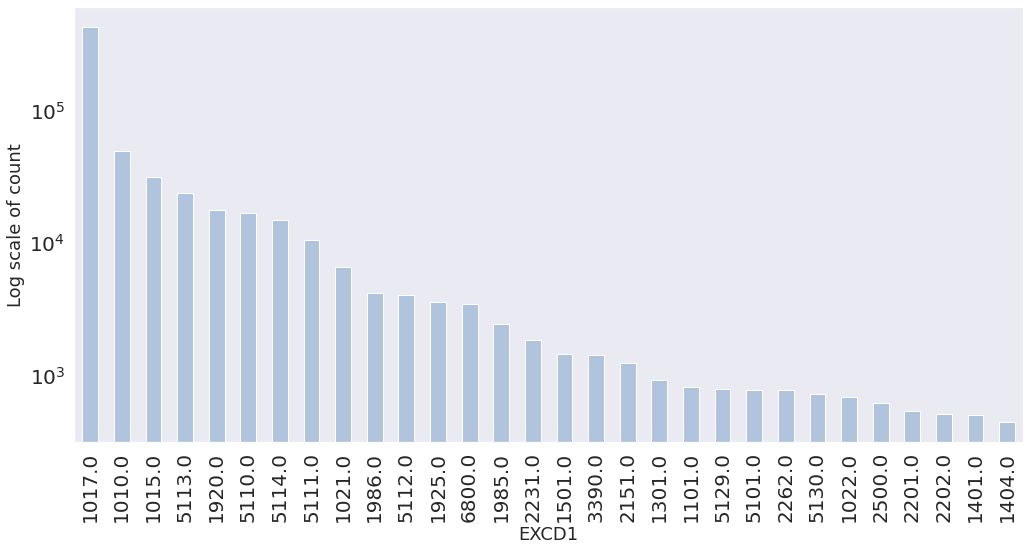

In [171]:
# EXCD1
fig = df["EXCD1"].value_counts().head(30).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="EXCD1",
    grid=False,
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig('excd1', bbox_inches='tight')

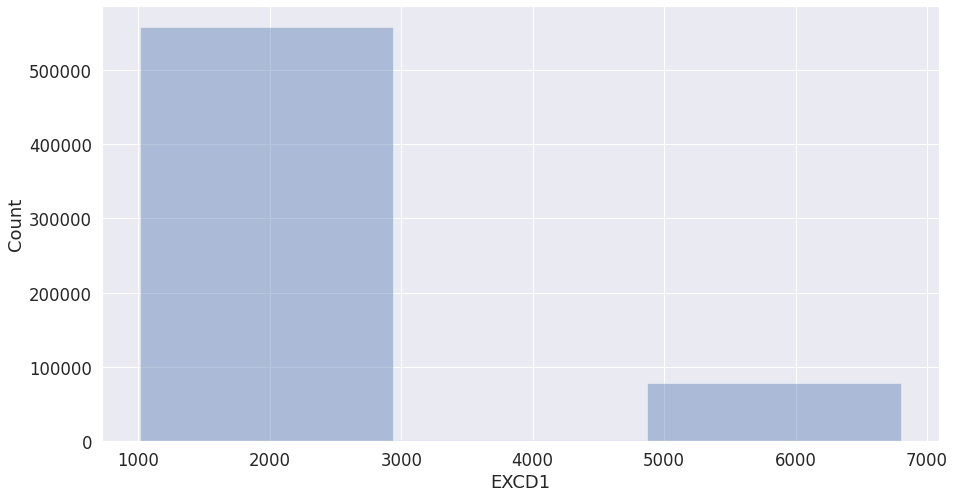

In [97]:
# EXCD1
fig = sns.distplot(df.query('EXCD1<=6800')['EXCD1'], bins=3, kde=False)
#fig.set_yscale("log")
fig.set_ylabel("Count")
#plt.savefig('excd1')

In [88]:
df['EXCD1'].quantile(0.997)

6800.0

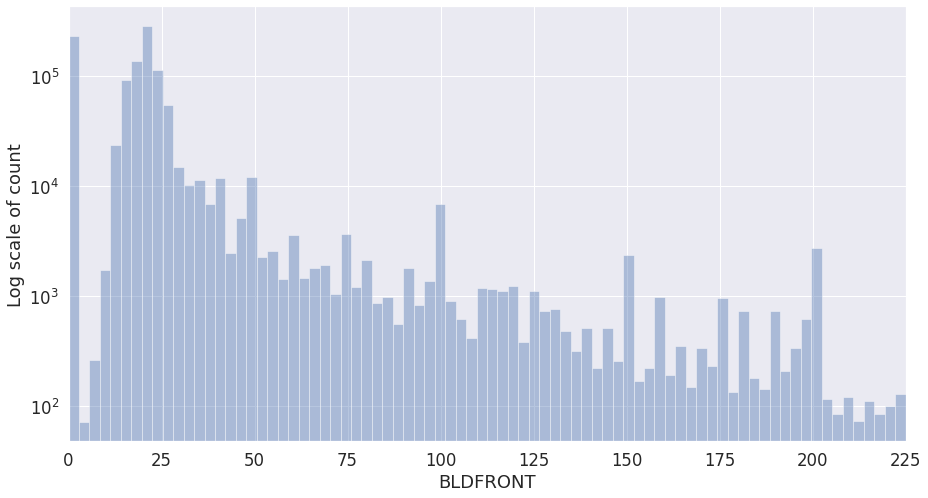

In [103]:
# BLDFRONT
plt.xlim(0, 225)
fig = sns.distplot(
    df.query("BLDFRONT<=225")["BLDFRONT"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("bldfront.jpeg")

In [187]:
df["BLDFRONT"].quantile(0.997)

225.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


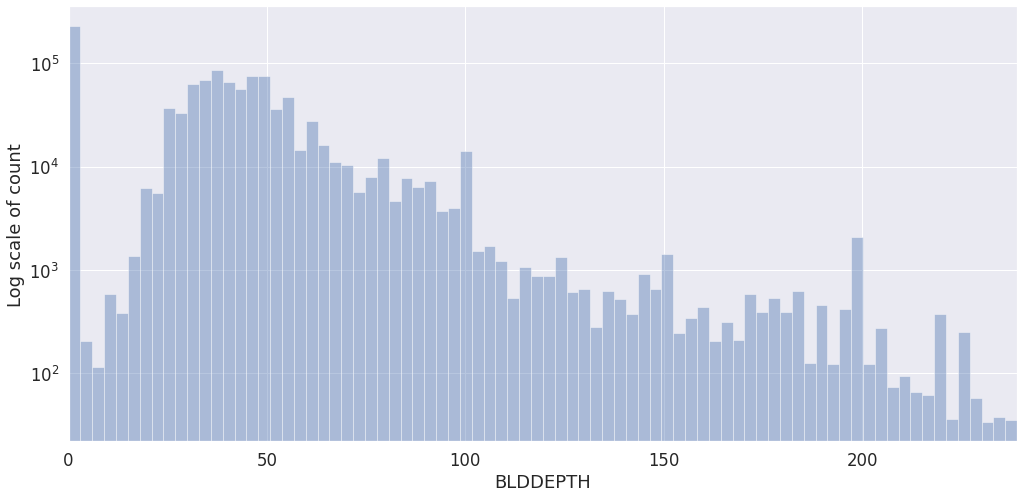

In [186]:
# BLDDEPTH
plt.xlim(0, 239)
fig = sns.distplot(
    df.query("BLDDEPTH<=239")["BLDDEPTH"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("blddepth.jpeg")

In [185]:
df["BLDDEPTH"].quantile(0.997)

239.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


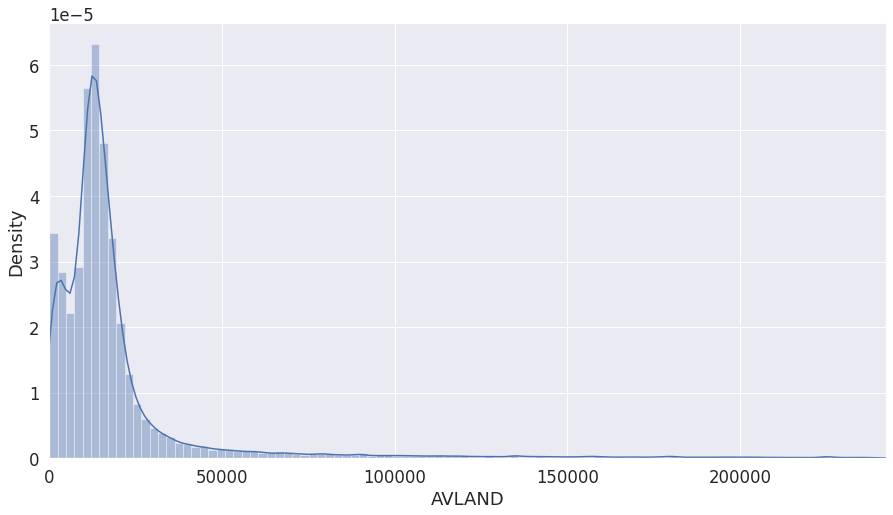

In [111]:
# AVLAND2
plt.xlim(0, 242280)
fig = sns.distplot(
    df.query("AVLAND<=242280")["AVLAND"],
    kde=True,
    bins=100,
    norm_hist=True
)
# fig.ticklabel_format(style='plain', axis='y')
#plt.savefig("avland2.jpeg")

In [50]:
df["AVLAND2"].quantile(0.90)
#(df["AVLAND2"].quantile(0.75) - df["AVLAND2"].quantile(0.25)) * 1.5

242280.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


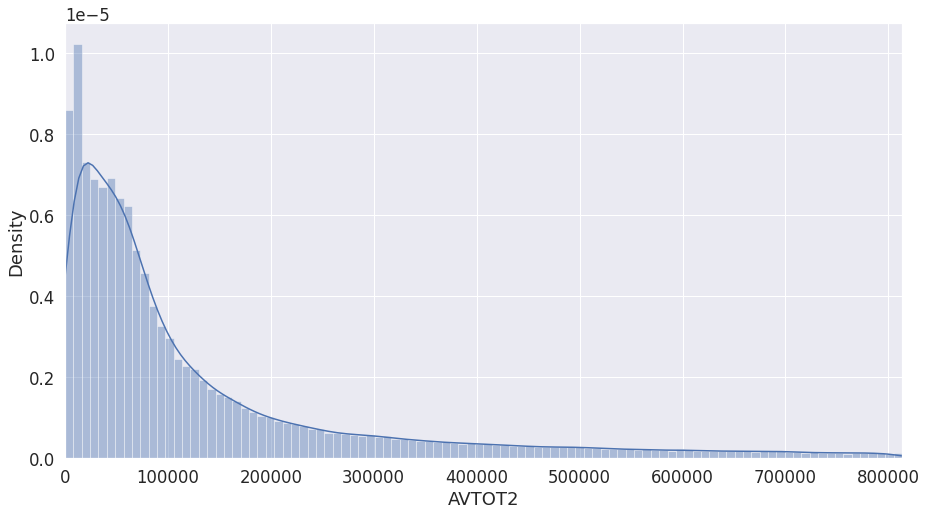

In [116]:
# AVTOT2
plt.xlim(0, 813194)
fig = sns.distplot(
    df.query("AVTOT2<813194")["AVTOT2"],
    kde=True,
    bins=100,
    norm_hist=True
)
#fig.ticklabel_format(style='plain', axis='y')
#plt.savefig("avtot2.jpeg")

In [52]:
df["AVTOT2"].quantile(0.90)

813194.0999999996

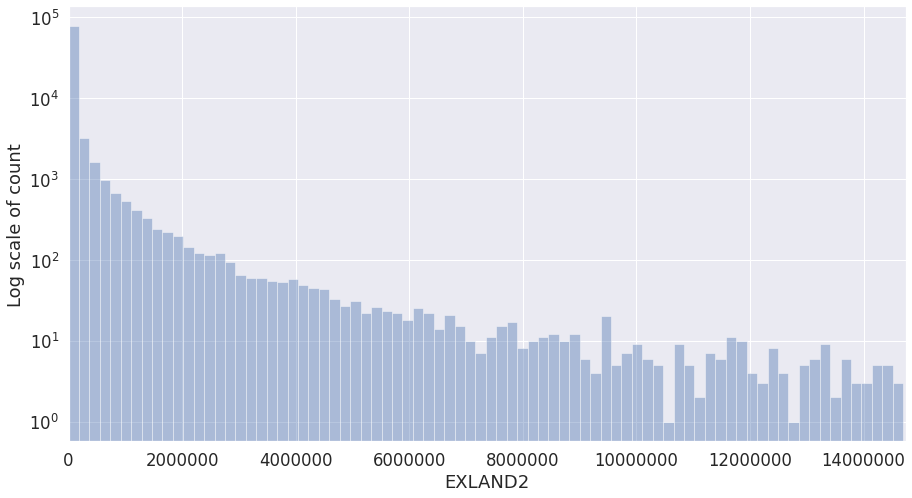

In [118]:
# EXLAND2
plt.xlim(0, 14739214)
fig = sns.distplot(
    df.query("EXLAND2<=14739214")["EXLAND2"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("exland2.jpeg")

In [56]:
df["EXLAND2"].quantile(0.997)

14739213.600000173

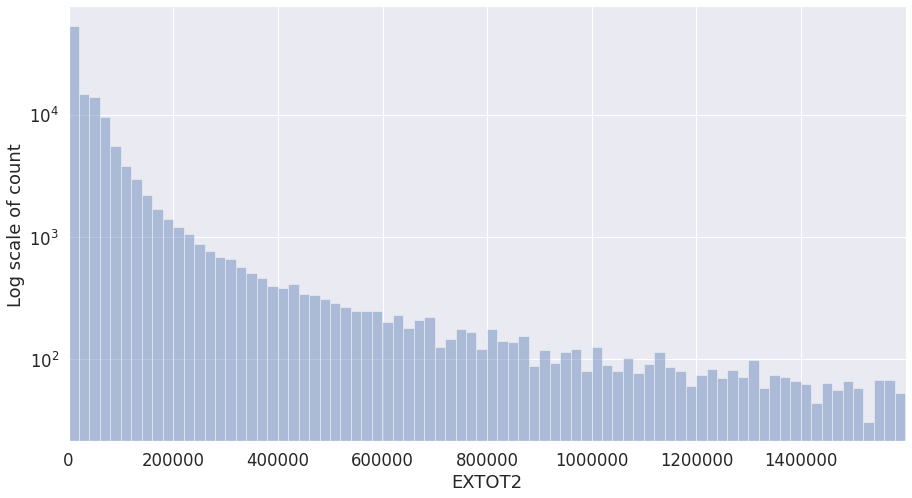

In [133]:
# EXTOT2
plt.xlim(0, 1599439)
fig = sns.distplot(
    df.query("EXTOT2<=1599439")["EXTOT2"],
    kde=False,
    bins=80,
    norm_hist=False
)
fig.ticklabel_format(style='plain', axis='x')
fig.set_yscale('log')
fig.set_ylabel('Log scale of count')
#plt.savefig("extot2.jpeg")

In [132]:
df["EXTOT2"].quantile(0.95)

1599439.4999999963

In [135]:
df['EXCD2'].quantile(.99)

5112.0

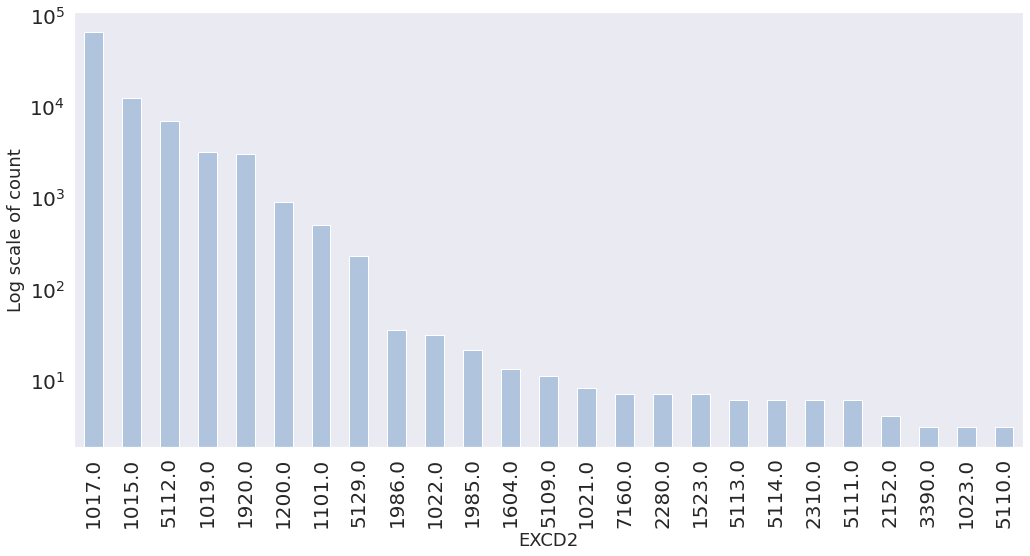

In [176]:
# EXCD2
fig = df["EXCD2"].value_counts().head(25).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="EXCD2",
    grid=False,
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig('excd2', bbox_inches='tight')

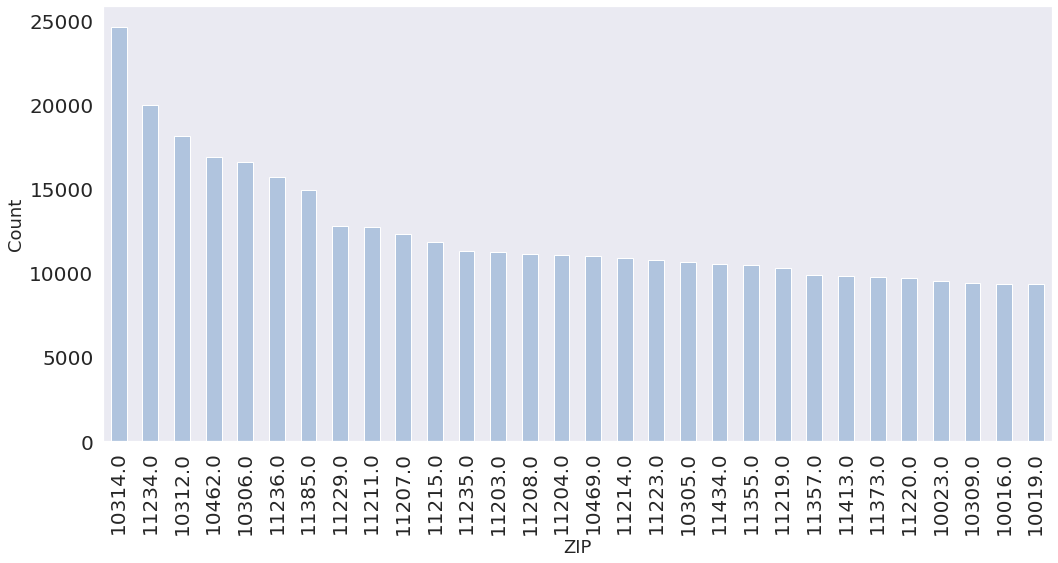

In [174]:
# ZIP
fig = df["ZIP"].value_counts().head(30).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="ZIP",
    grid=False,
)
#fig.set_yscale("log")
#fig.set_ylabel("Log scale of count")
#plt.savefig('zip.jpeg', bbox_inches='tight')

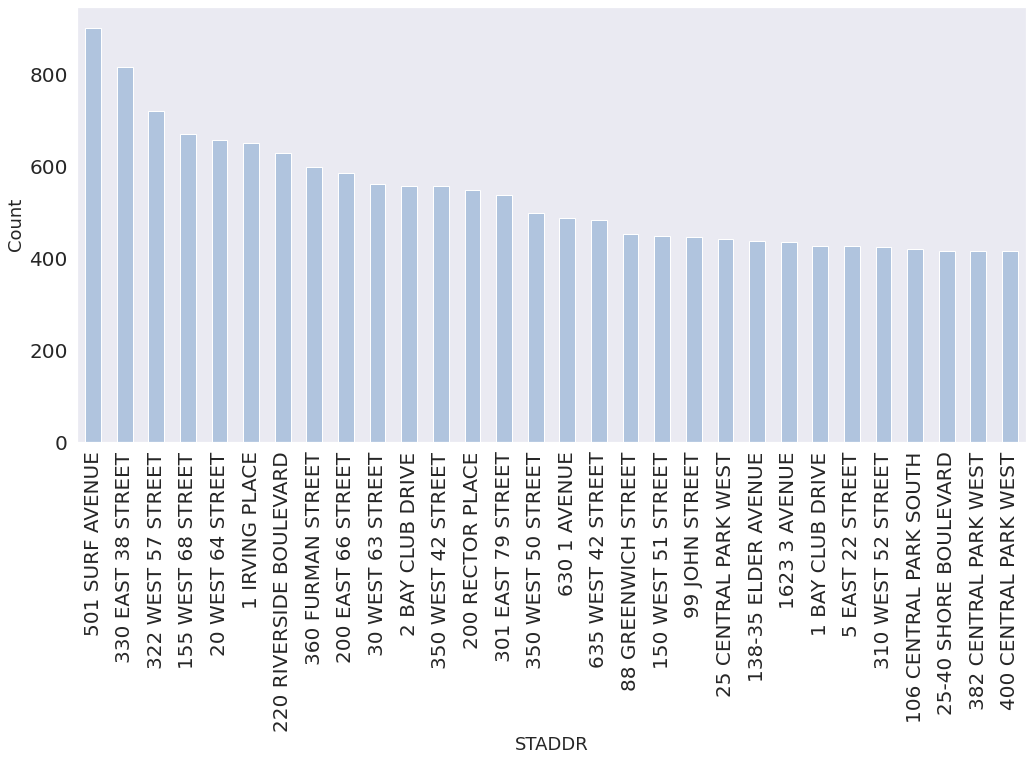

In [172]:
# STADDR
fig = df["STADDR"].value_counts().head(30).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    ylabel="Count",
    xlabel="STADDR",
    grid=False,
)
#fig.set_yscale("log")
#fig.set_ylabel("Log scale of count")
#plt.savefig('staddr.jpeg', bbox_inches='tight')

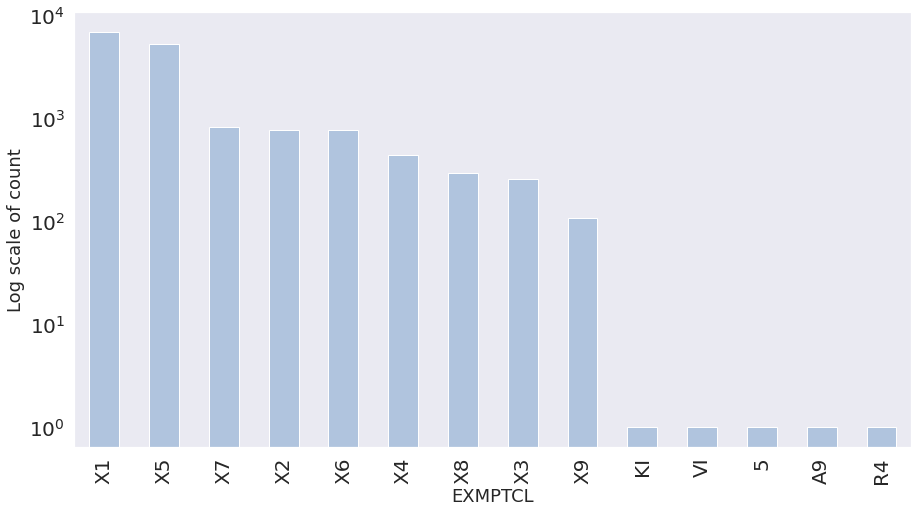

In [143]:
# EXMPTCL
fig = df["EXMPTCL"].value_counts().head(30).plot(
    kind="bar",
    color="lightsteelblue",
    fontsize=20,
    xlabel="EXMPTCL",
    grid=False,
)
fig.set_yscale("log")
fig.set_ylabel("Log scale of count")
#plt.savefig('exmptcl.jpeg')